To do:

1)Pie charta ara koy https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

2)Name wordcloud

3)Yüzdelik olarak train["Age] sonucuyla kdeplot'a ortalama koy

In [13]:
import numpy as np # numerical python
import pandas as pd # data processing
import matplotlib as plt2
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import FuncFormatter
import seaborn as sns #statistical data visualization
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm 
import pylab as py 
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
from PIL import Image


import warnings#ignore warnings
warnings.filterwarnings("ignore")


print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)
print("Matplotlib version:",plt2.__version__)
print("Seaborn version:",sns.__version__)
print("Wordcloud version:",wordcloud.__version__)
print("Image version:",Image.__version__)

Pandas version: 1.1.3
Numpy version: 1.19.2
Matplotlib version: 3.3.4
Seaborn version: 0.11.0
Wordcloud version: 1.5.0
Image version: 8.2.0


In [17]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
gender_submission = pd.read_csv("data/gender_submission.csv")
train["Age"] = train["Age"].fillna(train["Age"].mean())
train["Cabin"] = train["Cabin"].fillna("G6")
train["Embarked"] = train["Embarked"].fillna("Q")
print(pd.isnull(train).sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


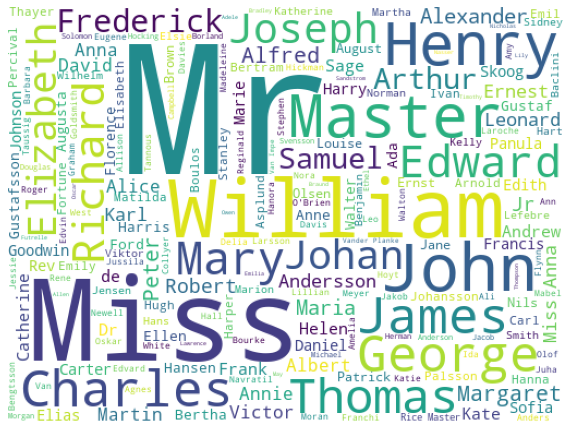

In [18]:
def plot_cloud(wordcloud):
    des = train["Name"]
    plt.subplots(figsize=(10,10))
    wordcloud = WordCloud(    background_color='white',
                              width=512,
                              height=384,
                             ).generate(" ".join(des))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
plot_cloud(wordcloud)

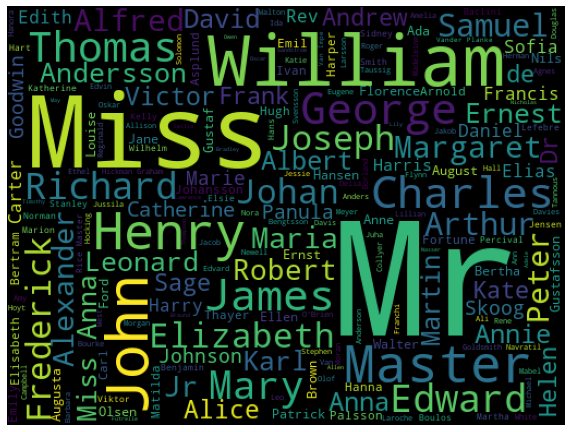

In [19]:
def plot_cloud2(wordcloud):
    des = train["Name"]
    plt.subplots(figsize=(10,10))
    wordcloud = WordCloud(    background_color="black",
                              width=512,
                              height=384,
                             ).generate(" ".join(des))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
plot_cloud2(wordcloud)

# Custom Font 
more fonts: https://www.dafont.com/

In [45]:
paperback = "fonts/Paperback Writer.ttf"
coolvetica = "fonts/coolvetica/coolvetica condensed rg.ttf"

In [46]:
train["Name"] = train["Name"].str.replace('[Mr,MR,MISS]', '')

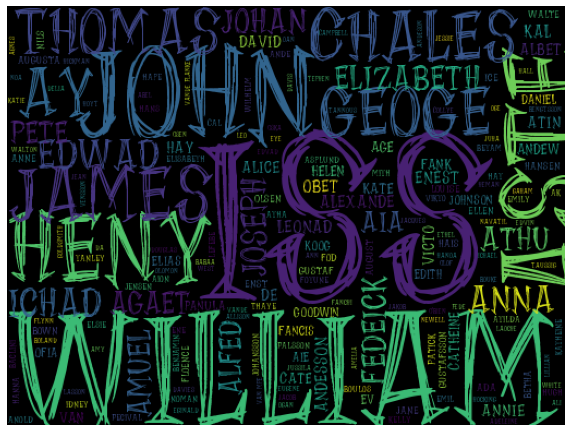

In [47]:
def plot_cloud3(wordcloud):
    des = train["Name"]
    plt.subplots(figsize=(10,10))
    wordcloud = WordCloud(background_color="black", stopwords=STOPWORDS,
                          font_path = paperback,
                          width=512,
                          height=384,
                          ).generate(" ".join(des))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
plot_cloud3(wordcloud)

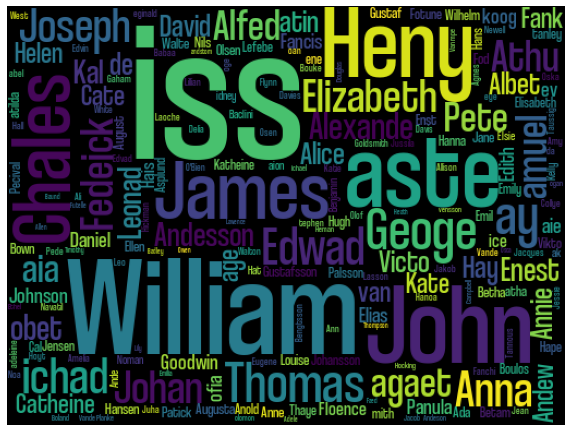

In [48]:
def plot_cloud4(wordcloud):
    des = train["Name"]
    plt.subplots(figsize=(10,10))
    wordcloud = WordCloud(background_color="black", stopwords=STOPWORDS,
                          font_path = coolvetica,
                          width=512,
                          height=384,
                          ).generate(" ".join(des))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
plot_cloud4(wordcloud)

# Masks

In [49]:
coment = np.array(Image.open('masks/comment.png'))
loc = np.array(Image.open('masks/loc.png'))
star = np.array(Image.open('masks/star.png'))
upvote = np.array(Image.open('masks/upvote.png'))
upvote2 = np.array(Image.open('masks/upvote2.png'))
user = np.array(Image.open('masks/user.png'))

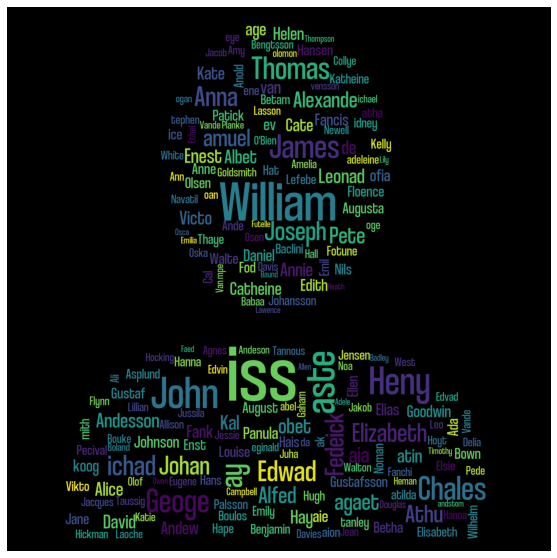

In [50]:
def plot_cloud5(wordcloud):
    des = train["Name"]
    plt.subplots(figsize=(10,10))
    wordcloud = WordCloud(background_color="black", stopwords=STOPWORDS,
                          font_path = coolvetica,
                          width=512,
                          height=384,
                          mask= user,
                          ).generate(" ".join(des))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
plot_cloud5(wordcloud)

resource: https://amueller.github.io/word_cloud/auto_examples/a_new_hope.html

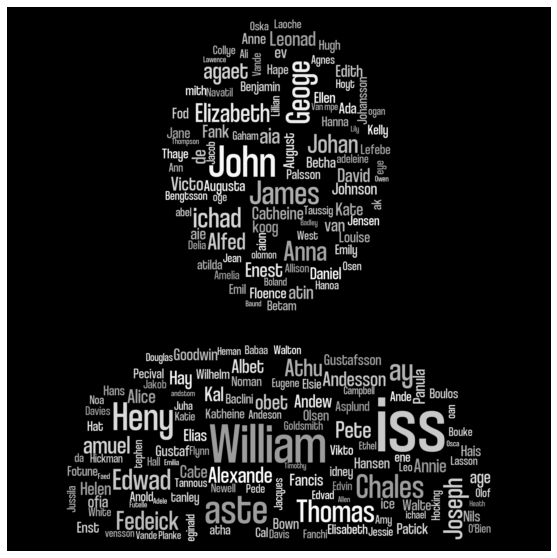

In [54]:
import random
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)
def plot_cloud5(wordcloud):
    des = train["Name"]
    plt.subplots(figsize=(10,10))
    wordcloud = WordCloud(background_color="black", stopwords=STOPWORDS,
                          font_path = coolvetica,
                          width=512,
                          height=384,
                          mask= user,
                          ).generate(" ".join(des))
    plt.imshow(wordcloud.recolor(color_func=grey_color_func,random_state=3),
           interpolation="bilinear")
    plt.axis('off')
    plt.show()
plot_cloud5(wordcloud)

resource: https://towardsdatascience.com/create-word-cloud-into-any-shape-you-want-using-python-d0b88834bc32

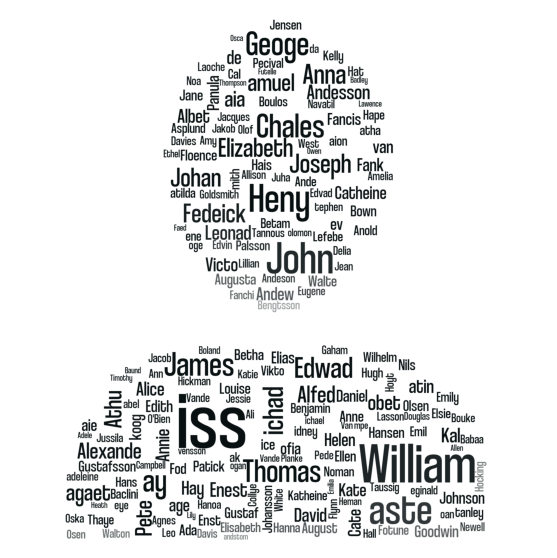

In [57]:
mask_colors = ImageColorGenerator(user)
def plot_cloud5(wordcloud):
    des = train["Name"]
    plt.subplots(figsize=(10,10))
    wordcloud = WordCloud(background_color="white", stopwords=STOPWORDS,
                          font_path = coolvetica,
                          width=512,
                          height=384,
                          mask= user,
                          color_func=mask_colors
                          ).generate(" ".join(des))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
plot_cloud5(wordcloud)

# Day 20
Visualization